<a href="https://colab.research.google.com/github/Furank1/Red-Neuronal-con-MNIST/blob/main/Laboratorio_Red_Neuronal_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio: Red Neuronal con MNIST  
**Curso:** Machine Learning  
**Total puntos:** 10

**Objetivo:** Implementar una red neuronal simple para clasificar dígitos escritos a mano del conjunto de datos MNIST utilizando Python y Keras.



## Paso 1: Cargar el conjunto de datos MNIST (1 punto)

Ejecuta el siguiente bloque para descargar y explorar el conjunto de datos.


In [2]:
from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de test:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de test: (10000, 28, 28)



## Paso 2: Visualizar ejemplos del dataset (1 punto)

✏️ **Slot para completar:** Visualiza al menos 5 imágenes con sus etiquetas utilizando `matplotlib.pyplot.imshow()`.


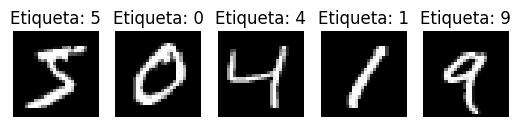

In [3]:

import matplotlib.pyplot as plt

# Visualiza 5 imágenes y sus etiquetas
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.show()



## Paso 3: Preprocesamiento (1 punto)

✏️ **Slot para completar:**
- Normaliza las imágenes (divide por 255.0).
- Aplana cada imagen a un vector de 784 valores.
- Codifica las etiquetas con `to_categorical`.


In [5]:

from tensorflow.keras.utils import to_categorical

# Normaliza las imágenes
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm = x_test.astype('float32') / 255.0

# Flatten de cada imagen
x_train_flat = x_train_norm.reshape(-1, 28*28)
x_test_flat = x_test_norm.reshape(-1, 28*28)

# Codificación one-hot de las etiquetas
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)



## Paso 4: Definir la red neuronal (2 puntos)

✏️ **Slot para completar:**
- Crea un modelo `Sequential`.
- Agrega una capa oculta con activación ReLU.
- Agrega una capa de salida con activación Softmax.
- Compila el modelo con `adam` y `categorical_crossentropy`.


In [8]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),   # capa oculta
    Dense(10, activation='softmax')                      # capa de salida
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



## Paso 5: Entrenar el modelo (1 punto)

✏️ **Slot para completar:** Entrena el modelo con `fit` durante 5 épocas y batch size 32.


In [9]:

history = model.fit(x_train_flat, y_train_cat, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8714 - loss: 0.4558 - val_accuracy: 0.9590 - val_loss: 0.1416
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9641 - loss: 0.1230 - val_accuracy: 0.9723 - val_loss: 0.0957
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9746 - loss: 0.0835 - val_accuracy: 0.9720 - val_loss: 0.0925
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9823 - loss: 0.0578 - val_accuracy: 0.9777 - val_loss: 0.0811
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9849 - loss: 0.0469 - val_accuracy: 0.9745 - val_loss: 0.0880



## Paso 6: Evaluar el modelo (1 punto)

✏️ **Slot para completar:** Evalúa el modelo con `evaluate()` en el conjunto de prueba.


In [10]:
loss, accuracy = model.evaluate(x_test_flat, y_test_cat)
print(f"Test accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9705 - loss: 0.1029
Test accuracy: 0.9740


## Preguntas de Reflexión (3 puntos en total)

### 1. ¿Qué ventaja observas al usar codificación one-hot para las etiquetas? (0.5 punto)

In [ ]:
#La codificación one-hot permite que el modelo clasifique entre varias clases (en este caso, 10 dígitos)
#usando una sola neurona de salida por clase y la función de pérdida categorical_crossentropy.
#Esto facilita el entrenamiento y evita confusión entre clases.

### 2. ¿Qué ocurre si aumentas o disminuyes el número de neuronas ocultas? (0.5 punto)

In [ ]:
#Si aumentas el número de neuronas ocultas, el modelo puede aprender representaciones más complejas
#y posiblemente mejorar su precisión (hasta cierto punto), pero también puede sobreajustar.
#Si reduces las neuronas, el modelo tendrá menos capacidad de aprendizaje y podría tener menor precisión.



### 3. ¿Qué alternativa propondrías al optimizador `adam` y por qué? (0.5 punto)

In [ ]:
#Una alternativa común es el optimizador SGD (descenso de gradiente estocástico). Es más simple que Adam y,
#en algunos casos, puede llevar a una mejor generalización, aunque requiere ajuste cuidadoso de la tasa de aprendizaje.

### 4. ¿Cómo cambia el desempeño si entrenas más épocas? ¿Cuál es el riesgo? (0.5 punto)

In [ ]:
#Al entrenar más épocas, el modelo puede aprender mejor, pero el riesgo es el sobreajuste: el modelo memoriza los datos de entrenamiento y pierde capacidad de generalizar a datos nuevos

### 5. ¿Por qué es importante dividir en conjuntos de entrenamiento y prueba? (1 punto)

In [ ]:
#Es esencial para evaluar si el modelo realmente ha aprendido a generalizar y no solo a memorizar los datos.
#El conjunto de prueba contiene datos que el modelo no ha visto durante el entrenamiento y permite medir su desempeño "en el mundo real".